IMPORT DATA

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA

In [520]:
fish = pd.read_csv("Fish.csv")

In [521]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [522]:
fish.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [523]:
fish.shape

(159, 7)

In [524]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [525]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


DATA CLEANING

In [526]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [527]:
fish_types_count = fish["Species"].value_counts()
fish_types_count= pd.DataFrame(fish_types_count)
fish_types_count.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [528]:
fish_types_count["types"] = fish_types_count.index

In [529]:
fish_types_count

,Species,types
Perch,56,Perch
Bream,35,Bream
Roach,20,Roach
Pike,17,Pike
Smelt,14,Smelt
Parkki,11,Parkki
Whitefish,6,Whitefish


In [530]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [531]:
col_values = fish.columns.values
col_values = col_values[1:]

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


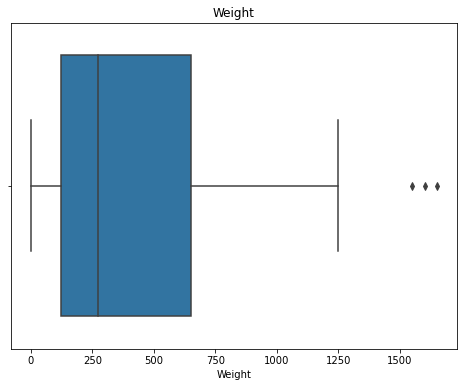

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


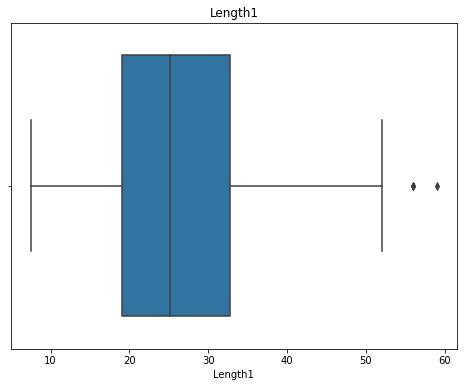

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


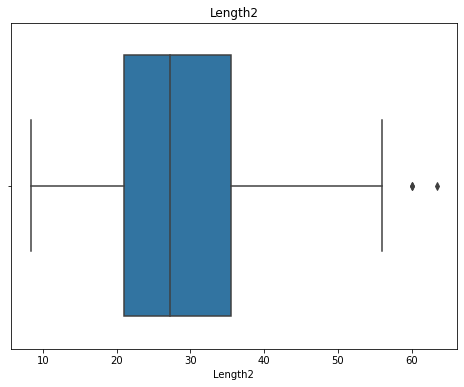

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


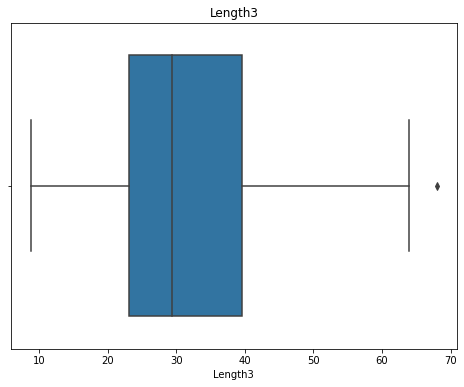

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


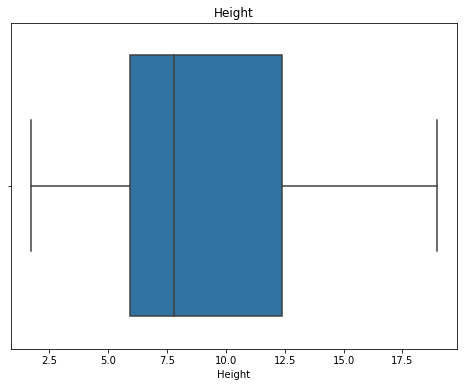

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


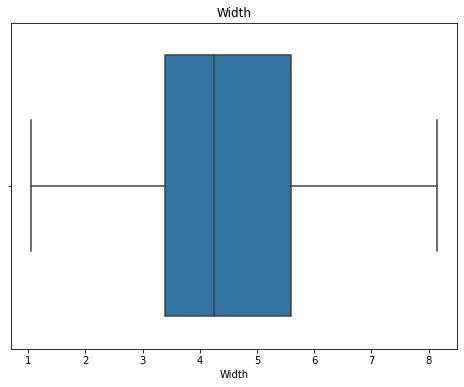

In [532]:
for col in col_values:
    plt.figure(figsize=(8,6))
    sns.boxplot(fish[col])
    plt.title(col)
    plt.show()

In [533]:
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [534]:
for col in col_values:
    print('#'*20, col)
    print(outliers(fish, col))

#################### Weight
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length1
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length2
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length3
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
#################

In [535]:
fish.drop([142, 143, 144], inplace=True)

In [536]:
fish.shape

(156, 7)

DATA VISUALIZATION

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='types', ylabel='Species'>

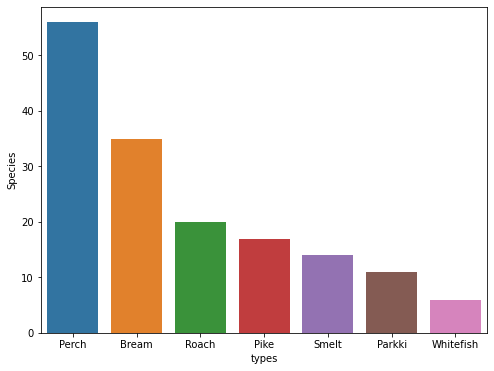

In [537]:
plt.figure(figsize=(8,6))
sns.barplot("types","Species", data=fish_types_count)

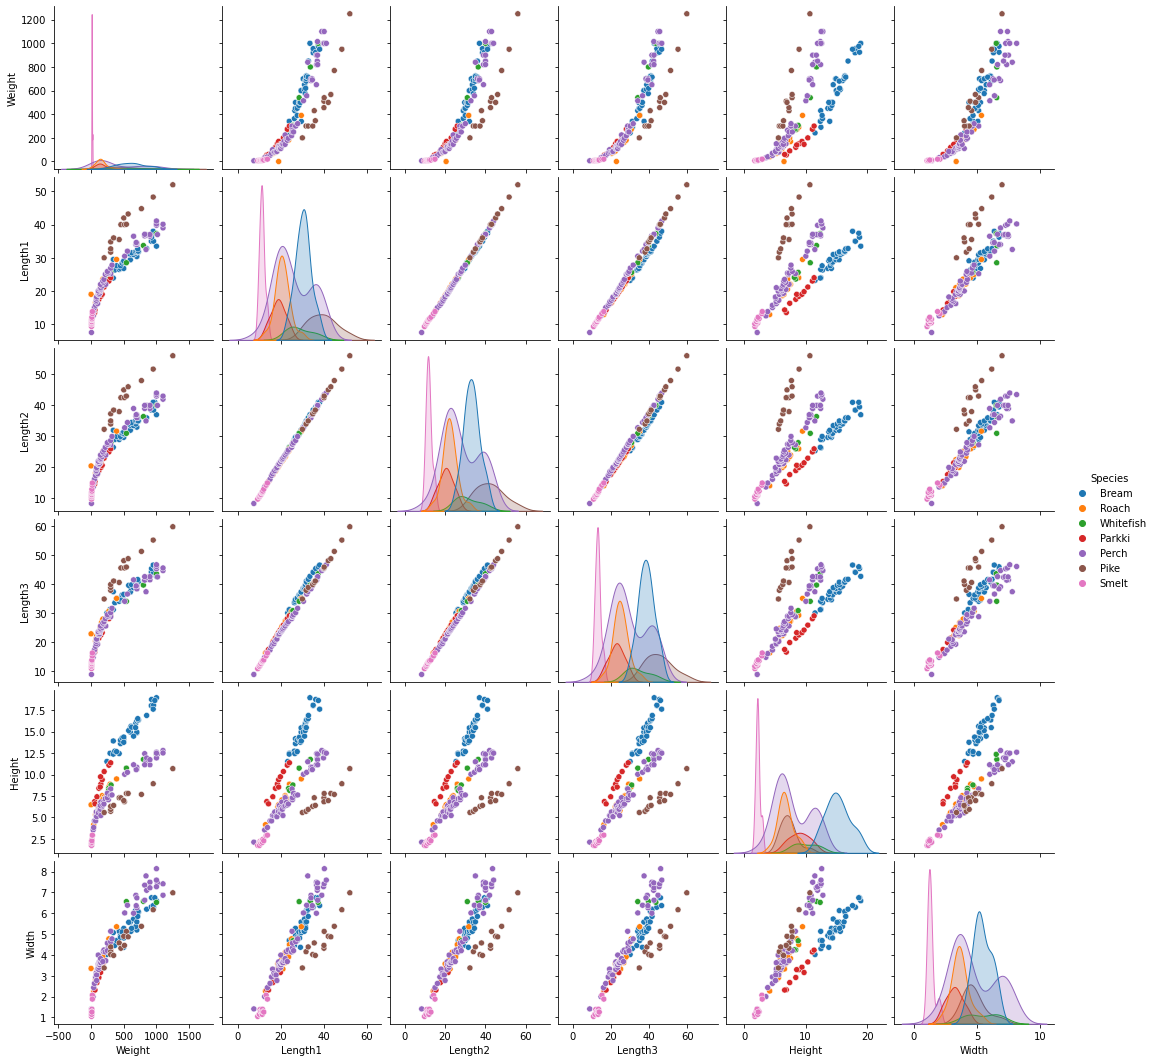

In [538]:
sns.pairplot(fish, hue="Species")

<AxesSubplot:>

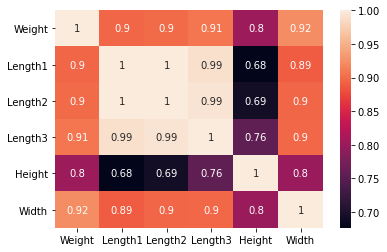

In [539]:
sns.heatmap(fish.corr(),annot=True)

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


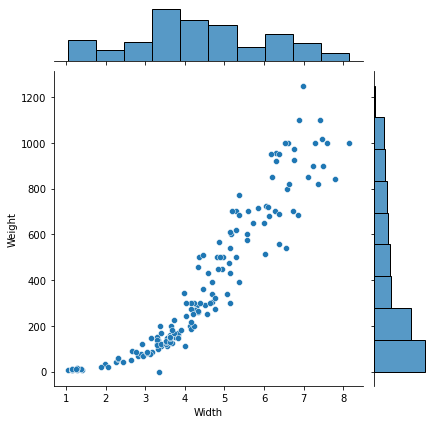

In [540]:
sns.jointplot("Width", "Weight", data=fish)

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


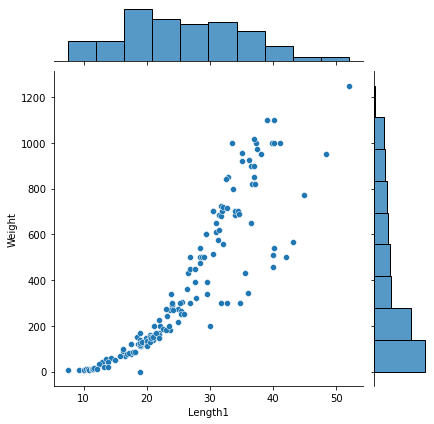

In [541]:
sns.jointplot("Length1", "Weight", data=fish)

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


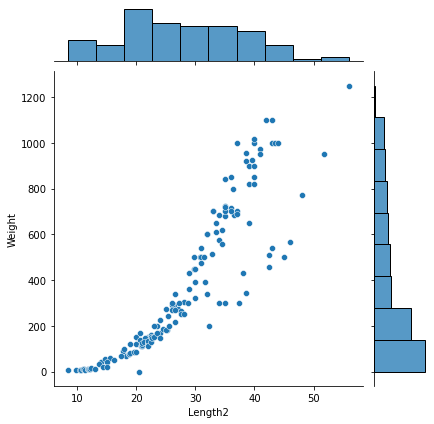

In [542]:
sns.jointplot("Length2", "Weight", data=fish)

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


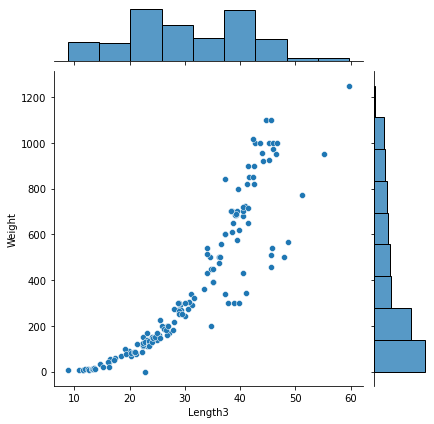

In [543]:
sns.jointplot("Length3", "Weight", data=fish)

CREATE TRAIN DATA AND TEST DATA

In [544]:
X = fish.drop(["Species","Weight"], axis=1)

In [545]:
y = fish["Weight"]

In [546]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [547]:
X_train

,Length1,Length2,Length3,Height,Width
115,34.6,37.0,39.3,10.5717,6.3666
68,19.8,21.5,24.1,9.7364,3.1571
156,12.1,13.0,13.8,2.2770,1.2558
21,31.4,34.0,39.2,15.9936,5.3704
63,16.3,17.7,19.8,7.4052,2.6730
...,...,...,...,...,...
134,40.0,42.5,45.5,7.2800,4.3225
145,9.3,9.8,10.8,1.7388,1.0476
56,24.1,26.5,29.3,8.1454,4.2485
124,39.8,43.0,45.2,11.9328,7.2772


TRAIN MODEL

In [548]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [549]:
regressor.fit(X_train, y_train)

LinearRegression()

In [550]:
y_train_predict = regressor.predict(X_train)

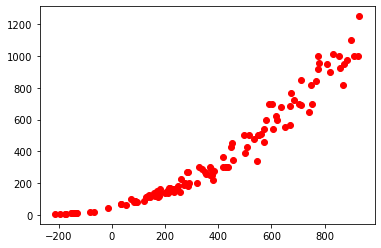

In [551]:
plt.scatter(y_train_predict, y_train, color="red")

In [552]:
y_train_predict[:5]

array([ 712.20290168,  255.89439273, -136.00350369,  668.52369001,
        118.77624831])

In [553]:
y_train[:5]

115    690.0
68     145.0
156     12.2
21     685.0
63      90.0
Name: Weight, dtype: float64

TEST MODEL AND RESULTS

In [554]:
y_test_predict = regressor.predict(X_test)

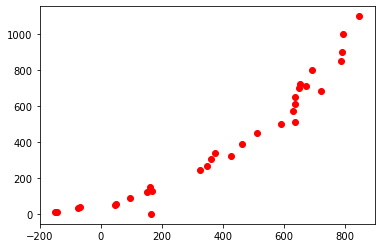

In [555]:
plt.scatter(y_test_predict, y_test, color="red")

In [556]:
print("Linear regressor coef:",regressor.coef_)

Linear regressor coef: [101.81290386 -48.24248955 -33.01452944  34.47857897  53.04782998]


In [557]:
print("Linear regressor intercept:",regressor.intercept_)

Linear regressor intercept: -430.3119591800989


In [558]:
k = X_test.shape[1]
n = len(X_test)

In [559]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict)), '.3f'))
MAE = mean_absolute_error(y_test, y_test_predict)
MSE = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_test_predict)/y_test))*100

In [560]:
print("RMSE:",RMSE)

RMSE: 98.901


In [561]:
print("MAE:",MAE)

MAE: 79.36085183197557


In [562]:
print("MSE",MSE)

MSE 9781.457511405306


In [563]:
print("r2_score:",r2)

r2_score: 0.9061208110662905


In [564]:
print("MAPE:",MAPE)

MAPE: inf


CHECK WEIGHT FOR MADEUP FISH FEATURES

In [565]:
new_x = np.asarray([[23.2,25.4,30.0,11.5200,4.0200]])
# new_x = np.reshape(new_x, (-1,1))

In [566]:
new_x

array([[23.2 , 25.4 , 30.  , 11.52,  4.02]])

In [567]:
new_pred = regressor.predict(new_x)

In [568]:
new_pred

array([326.39779886])

In [573]:
fish.shape

(156, 7)